In [28]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes  import GaussianNB

In [3]:
import urllib.request
import os
import gzip
import numpy as np

def download_mnist():
    base_url = 'yann.lecun.com/exdb/mnist/'
    file_names = ['train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz',
                  't10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz']
    data_dir = './data/mnist'

    if not os.path.exists(data_dir):
        os.makedirs(data_dir)

    for file_name in file_names:
        file_path = os.path.join(data_dir, file_name)
    if not os.path.exists(file_path):
        file_url = base_url + file_name
        print('Downloading', file_url)
        urllib.request.urlretrieve(file_url, file_path)

def load_mnist():
    data_dir = './data/mnist'

    # Load training images
    with gzip.open(os.path.join(data_dir, 'train-images-idx3-ubyte.gz'), 'rb') as f:
        train_images = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28, 28)

    # Load training labels
    with gzip.open(os.path.join(data_dir, 'train-labels-idx1-ubyte.gz'), 'rb') as f:
        train_labels = np.frombuffer(f.read(), np.uint8, offset=8)

    # Load test images
    with gzip.open(os.path.join(data_dir, 't10k-images-idx3-ubyte.gz'), 'rb') as f:
        test_images = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28, 28)

    # Load test labels
    with gzip.open(os.path.join(data_dir, 't10k-labels-idx1-ubyte.gz'), 'rb') as f:
        test_labels = np.frombuffer(f.read(), np.uint8, offset=8)

    return train_images, train_labels, test_images, test_labels

# Download the dataset if not present
# download_mnist()

# Load the dataset
train_images, train_labels, test_images, test_labels = load_mnist()

In [4]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


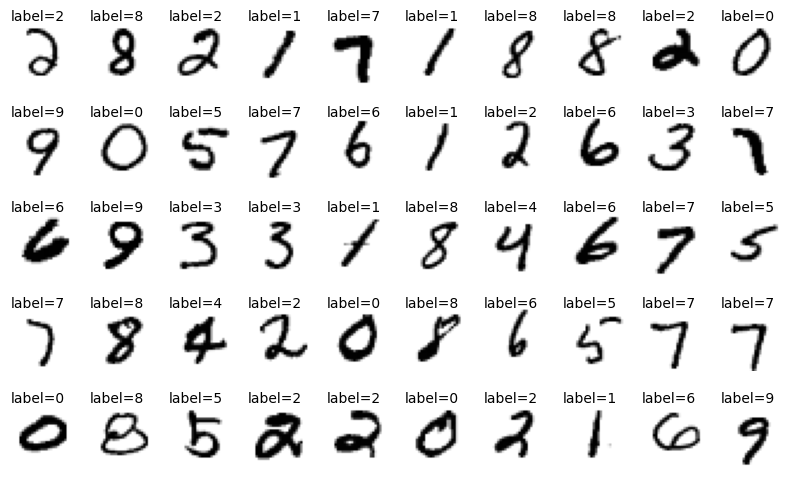

In [31]:
fig, axs = plt.subplots(5, 10, figsize=(10, 6))
for i in range(5):
    for j in range(10):
        idx = random.randint(0, 60000)
        axs[i, j].imshow(train_images[idx], cmap="gray_r")
        axs[i, j].axis("off")
        axs[i, j].text(0, 0, f"label={train_labels[idx]}")
plt.show()

In [36]:
X_train, X_test, y_train, y_test = train_images, test_images, train_labels, test_labels
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

In [37]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

## Bias

In [38]:
acc_train = clf.score(X_train, y_train)
acc_train

0.5649

## Varianza

### Test Accuracy

In [39]:
acc_val = clf.score(X_test, y_test)
acc_val

0.5558

In [40]:
(acc_val - acc_train) * 100

-0.9099999999999997

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components=100)
pca.fit(X_train)

PCA(n_components=100)

In [43]:
pca.explained_variance_ratio_

array([0.09704664, 0.07095924, 0.06169089, 0.05389419, 0.04868797,
       0.04312231, 0.0327193 , 0.02883895, 0.02762029, 0.02357001,
       0.0210919 , 0.02022991, 0.01715818, 0.01692111, 0.01578641,
       0.01482953, 0.01324561, 0.01276897, 0.01187263, 0.01152684,
       0.01066166, 0.01006713, 0.00953573, 0.00912544, 0.00883405,
       0.00839319, 0.00812579, 0.00786366, 0.00744733, 0.00690859,
       0.00658094, 0.00648148, 0.00602615, 0.00586582, 0.00570021,
       0.00543628, 0.00505786, 0.00487859, 0.00481429, 0.00472266,
       0.00456747, 0.00444836, 0.00418501, 0.00398215, 0.00384974,
       0.00375103, 0.00362008, 0.0035159 , 0.00340058, 0.00321874,
       0.00319017, 0.00312804, 0.0029598 , 0.00288953, 0.00284127,
       0.0027143 , 0.00269513, 0.00258468, 0.00253764, 0.00244771,
       0.00240491, 0.0023925 , 0.00230395, 0.00221513, 0.00213694,
       0.00207166, 0.00203022, 0.00196711, 0.00192786, 0.00188589,
       0.00186916, 0.00181002, 0.0017747 , 0.00174724, 0.00165

In [44]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [45]:
clf = GaussianNB()
clf.fit(X_train_pca, y_train)

GaussianNB()

## Bias

In [46]:
acc_train = clf.score(X_train_pca, y_train)
acc_train

0.8691333333333333

## Varianza

### Test Accuracy

In [48]:
acc_val = clf.score(X_test_pca, y_test)
acc_val

0.8787

In [49]:
(acc_val - acc_train) * 100

0.9566666666666723